# 装置中的子系统

用以记录和描述装置独立的子系统状态的 IDS 包括：

- 装置: wall, pf_active...
- 诊断 : magnetics, ECE, Langmuir Probes , Polarimeter...
- 辅助系统: LH Antennas, ECLauhchers,IC Antennas, NBI, Pellets...

数据来源包括：

- 装置静态几何信息；
- 实际控制信号或者设计控制方案；
- 实验诊断数据；

对于这类 IDS ，{{FyTok}} 通过 {{SpDM}} 数据集成工具将不同来源的数据汇总、映射为符合 IMAS Ontology 的形式。对于 EAST 目前完成数据映射的子系统有：wall, pf_active, magnetics.

```{note}
在后续示例中，分别以 `wall, pf_active, magnetics` 子系统作为示例，展示如何使用 {{FyTok}} 读取、处理、分析、可视化装置子系统数据。其中数据源包括：本地文件、数据库、远程服务器等。关于数据源的配置请参考{{SpDM}}的相关文档。
```


In [1]:
import os 
os .environ["FY_VERBOSE"]="debug"

from spdm.view import sp_view

## wall


`wall` 提供对托卡马克装置第一壁的描述（继承自 IMAS Ontology 的定义）

```{eval-rst}

.. autoclass:: fytok.modules.Wall.Wall
    :members: description_2d
    :undoc-members: time_slice
    :member-order: bysource
    :show-inheritance: True

```


### 创建 `Wall` 实例


In [2]:
from fytok.modules.wall import Wall

wall = Wall("east://#wall")

2024-06-01 09:58:43,317 [   fytok]     INFO: Failed to import IMAS wrapper. Using dummy ontology as fallback.
2024-06-01 09:58:44,050 [   fytok]     INFO: 
###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU @ Institute of Plasma Physics Chinese Academy of Sciences 
            
 version = 0.4.1  (spdm=beta extension=0.2.3.dev0+g2cc21ff.d20240223)

 Run by salmon at 2024-06-01T09:58:43.316736.
 Job ID: fytok_salmon_surface_6662

###################################################################################################



由于`Wall`的描述来自装置信息，采用 URI `east://#wall`指定数据源。其中，`east://` 指定了装置 identificer ， {{FyTok}} 会根据其匹配合适的装置描述文件。`#wall` 意为从树中裁剪 `wall` 所对应的一支。由于不涉及数据库或其他动态数据源，省略了 URI 其他部分。

其中，关于 `limiter` 几何信息（ `wall.description_2d[0].limiter.unit[0].outline` ） 以`r`，`z`坐标数组的形式描述


### 可视化效果


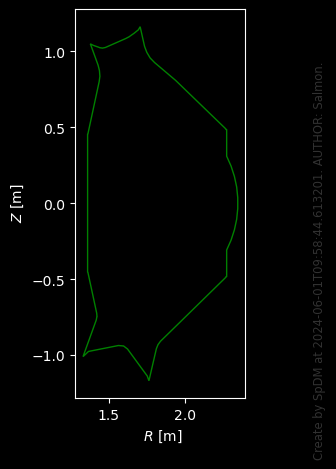

In [3]:
fig = sp_view.display(wall)

## pf_active


`pf_active` 提供对托卡马克装置极向场线圈的描述（继承自 IMAS Ontology 的定义）

```{eval-rst}

.. autoclass::fytok.ontology.imas_lastest.pf_active._T_pf_coils
    :members: *
    :member-order: bysource
    :show-inheritance: True
.. autoclass:: fytok.modules.PFActive.PFActive
    :members: coil
    :undoc-members: time_slice
    :member-order: bysource
    :show-inheritance: True

```


### 创建 `PFActive` 实例

以本地 MDSplus 数据创建 `PFActive` 实例：

In [4]:
from fytok.modules.pf_active import PFActive

pf_active = PFActive(f"east+mdsplus://./mdsplus/~t/?shot=70754#pf_active")

### 可视化

- 2D ：pf 线圈截面

2024-06-01 09:58:45,377 [   fytok]    ERROR: /home/salmon/workspace/fytok/SpDM/python/spdm/view/view_matplotlib.py:166:_draw: ignore unsupported geometry PFActive <PFActive name='PFActive' />! 
Traceback (most recent call last):
  File "/home/salmon/workspace/fytok/SpDM/python/spdm/plugins/data/plugin_mdsplus.py", line 158, in query
    res = tree.tdiExecute(tdi).data()
          ^^^^^^^^^^^^^^^^^^^^
  File "/fuyun/software/MDSplus/7.132.0-foss-2023a/lib/python3.11/site-packages/MDSplus/tree.py", line 1145, in tdiExecute
    return _dat.TdiExecute(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/fuyun/software/MDSplus/7.132.0-foss-2023a/lib/python3.11/site-packages/MDSplus/mdsdata.py", line 93, in TdiExecute
    return _cmp.EXECUTE(expression, *_unwrap(args))._setTree(**kwargs).evaluate()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/fuyun/software/MDSplus/7.132.0-foss-2023a/lib/python3.11/site-packages/MDSplus/compound.py", line 329, in __init__
   

/fuyun/software/MDSplus/7.132.0-foss-2023a/lib/python3.11/site-packages/MDSplus/mdsscalar.py:422: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  if not isinstance(self._value, _N.str):


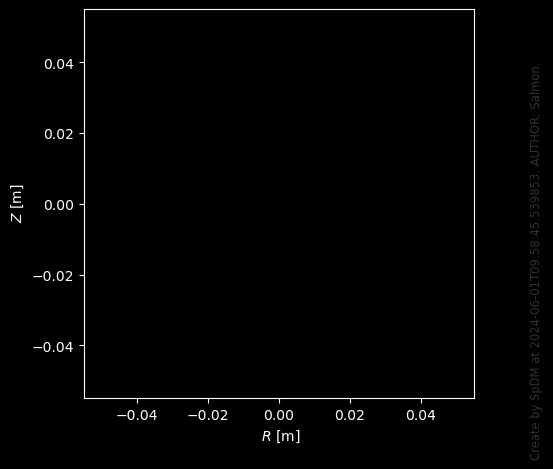

In [5]:
fig=sp_view.display(pf_active)


- 1D ：pf 线圈电流随时间变化

In [7]:
fig = sp_view.plot([(coil.current, {"label": False}) for coil in pf_active.coil], y_label=f"PF [A]", x_label="time[s]",title="PF Coil current")

RuntimeError: mds.mdsExceptions! tree_name=pcs_east shot=70754 tdi="DATA(\pcpf1 )"

## magnetics


`magnetics` 提供对托卡马克磁探针的描述（继承自 IMAS Ontology 的定义）

```{eval-rst}


.. autoclass:: fytok.modules.Magnetics.Magnetics
    :members: b_field_pol_probe, flux_loop
    :member-order: bysource
    :show-inheritance: True

```


### 创建 `Magnetics` 实例

以远程 MDSplus 数据库创建 `Magnetics` 实例：

In [8]:
from fytok.modules.magnetics import Magnetics

magnetics = Magnetics(f"east+mdsplus://202.127.204.12?shot=70754#magnetics")


### 可视化

- 2D ：磁探针空间分布

2024-06-01 09:59:17,647 [   fytok]    ERROR: /home/salmon/workspace/fytok/SpDM/python/spdm/view/view_matplotlib.py:166:_draw: ignore unsupported geometry Magnetics <Magnetics name='Magnetics' />! 
Traceback (most recent call last):
  File "/home/salmon/workspace/fytok/SpDM/python/spdm/plugins/data/plugin_mdsplus.py", line 117, in get_tree
    tree = mds.Tree(tree_name, shot, mode=mode, path=tree_path)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/fuyun/software/MDSplus/7.132.0-foss-2023a/lib/python3.11/site-packages/MDSplus/tree.py", line 559, in __init__
    self.open(mode)
  File "/fuyun/software/MDSplus/7.132.0-foss-2023a/lib/python3.11/site-packages/MDSplus/tree.py", line 531, in open
    _exc.checkStatus(status)
  File "/fuyun/software/MDSplus/7.132.0-foss-2023a/lib/python3.11/site-packages/MDSplus/mdsExceptions.py", line 94, in checkStatus
    raise exception
MDSplus.mdsExceptions.TreeFOPENR: %TREE-E-FOPENR, Error opening file read-only.

During handlin

Error in connect: timeout
send_bytes: Error sending data to remote server: Resource temporarily unavailable
Error during login: send: Resource temporarily unavailable
W, 1717207157.645:  remote_connect()              Host(conid=-1, links=?, unique='tcp://202.127.204.12:8000'), server='202.127.204.12': error
Error connecting to host /202.127.204.12/ in io_open_one_remote


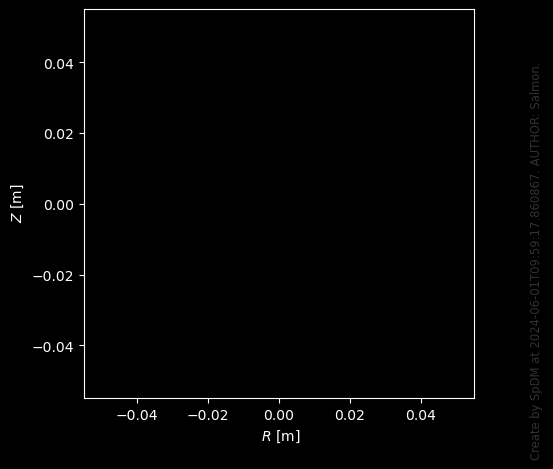

In [9]:
fig = sp_view.display(magnetics)

- 2D ：磁探针信号随时间变化

In [ ]:
fig = sp_view.plot(
    ([(probe.flux, {"label": False}) for probe in magnetics.flux_loop], {"y_label": f"[Wb]"}),
    x_label="time[s]",
    title=" flux_loop",
)